# BIKE Data Exploration and Visualization


## Preliminary Wrangling

Ford GoBike is a regional public bike sharing system in the San Francisco Bay Area, California. It is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States with nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers as of 2018. The dataset used for this exploratory analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob

%matplotlib inline

### Gathering and Assessing Data

In [2]:
# only ran once to append all monthly trip data together

folder_name = 'Data'
frames = [pd.read_csv(f) for f in glob.glob(os.path.join(folder_name, '*.csv'))]
result = pd.concat(frames, ignore_index=True)
print(result.shape)
result.sample(5)

(421676, 14)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
17731,355,2018-03-28 08:06:34.9520,2018-03-28 08:12:30.3990,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,36,Folsom St at 3rd St,37.783830,-122.398870,976,Subscriber,No
65820,361,2018-03-14 15:59:34.8140,2018-03-14 16:05:36.1060,74,Laguna St at Hayes St,37.776435,-122.426244,285,Webster St at O'Farrell St,37.783521,-122.431158,185,Subscriber,Yes
380182,469,2018-05-08 09:39:14.7480,2018-05-08 09:47:03.9830,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,58,Market St at 10th St,37.776619,-122.417385,1968,Subscriber,No
80613,1082,2018-03-09 16:37:27.6220,2018-03-09 16:55:30.3190,88,11th St at Bryant St,37.770030,-122.411726,70,Central Ave at Fell St,37.773311,-122.444293,2998,Subscriber,No
65557,732,2018-03-14 16:43:43.3820,2018-03-14 16:55:55.8420,90,Townsend St at 7th St,37.771058,-122.402717,22,Howard St at Beale St,37.789756,-122.394643,772,Subscriber,No


In [3]:
# save the appended result to a .csv for further usage

result.to_csv('fordgobike_trips_2018.csv', index=False)

In [4]:
df = pd.read_csv('fordgobike_trips_2018.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,71766,2018-03-31 16:58:33.1490,2018-04-01 12:54:39.2630,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,6,The Embarcadero at Sansome St,37.804770,-122.403234,341,Customer,No
1,62569,2018-03-31 19:03:35.9160,2018-04-01 12:26:25.0350,78,Folsom St at 9th St,37.773717,-122.411647,47,4th St at Harrison St,37.780955,-122.399749,536,Subscriber,No
2,56221,2018-03-31 20:13:13.5640,2018-04-01 11:50:14.8400,258,University Ave at Oxford St,37.872355,-122.266447,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3245,Customer,No
3,85844,2018-03-31 11:28:07.6580,2018-04-01 11:18:52.6130,186,Lakeside Dr at 14th St,37.801319,-122.262642,340,Harmon St at Adeline St,37.849735,-122.270582,3722,Customer,No
4,1566,2018-03-31 23:37:56.6400,2018-04-01 00:04:02.8930,193,Grand Ave at Santa Clara Ave,37.812744,-122.247215,196,Grand Ave at Perkins St,37.808894,-122.256460,2355,Subscriber,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421676 entries, 0 to 421675
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             421676 non-null  int64  
 1   start_time               421676 non-null  object 
 2   end_time                 421676 non-null  object 
 3   start_station_id         421676 non-null  int64  
 4   start_station_name       421676 non-null  object 
 5   start_station_latitude   421676 non-null  float64
 6   start_station_longitude  421676 non-null  float64
 7   end_station_id           421676 non-null  int64  
 8   end_station_name         421676 non-null  object 
 9   end_station_latitude     421676 non-null  float64
 10  end_station_longitude    421676 non-null  float64
 11  bike_id                  421676 non-null  int64  
 12  user_type                421676 non-null  object 
 13  bike_share_for_all_trip  421676 non-null  object 
dtypes: f

In [6]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
bike_share_for_all_trip    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [9]:
df.user_type.value_counts()

Subscriber    354950
Customer       66726
Name: user_type, dtype: int64

In [10]:
df.bike_share_for_all_trip.value_counts()

No     381853
Yes     39823
Name: bike_share_for_all_trip, dtype: int64

### Cleaning Data

In [11]:
# make a copy of the dataframe 
# issue 1: fix multiple fields that are not in the correct dtype

df2 = df.copy()
df2['start_time'] = pd.to_datetime(df2['start_time'])
df2['end_time'] = pd.to_datetime(df2['end_time'])

df2['start_station_id'] = df2['start_station_id'].astype('str')
df2['end_station_id'] = df2['end_station_id'].astype('str')
df2['bike_id'] = df2['bike_id'].astype('str')

df2['user_type'] = df2['user_type'].astype('category')

df2.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421676 entries, 0 to 421675
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             421676 non-null  int64         
 1   start_time               421676 non-null  datetime64[ns]
 2   end_time                 421676 non-null  datetime64[ns]
 3   start_station_id         421676 non-null  object        
 4   start_station_name       421676 non-null  object        
 5   start_station_latitude   421676 non-null  float64       
 6   start_station_longitude  421676 non-null  float64       
 7   end_station_id           421676 non-null  object        
 8   end_station_name         421676 non-null  object        
 9   end_station_latitude     421676 non-null  float64       
 10  end_station_longitude    421676 non-null  float64       
 11  bike_id                  421676 non-null  object        
 12  user_type       

In [12]:
# issue 2: add new columns for trip duration in minute, trip start date in yyyy-mm-dd format, trip start hour of the day, day of week and month

df2['duration_minute'] = df2['duration_sec']/60

df2['start_date'] = df2.start_time.dt.strftime('%Y-%m-%d')
df2['start_hourofday'] = df2.start_time.dt.strftime('%H')
df2['start_dayofweek'] = df2.start_time.dt.strftime('%A')
df2['start_month'] = df2.start_time.dt.strftime('%B')

df2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,duration_minute,start_date,start_hourofday,start_dayofweek,start_month
0,71766,2018-03-31 16:58:33.149,2018-04-01 12:54:39.263,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,6,The Embarcadero at Sansome St,37.804770,-122.403234,341,Customer,No,1196.100000,2018-03-31,16,Saturday,March
1,62569,2018-03-31 19:03:35.916,2018-04-01 12:26:25.035,78,Folsom St at 9th St,37.773717,-122.411647,47,4th St at Harrison St,37.780955,-122.399749,536,Subscriber,No,1042.816667,2018-03-31,19,Saturday,March
2,56221,2018-03-31 20:13:13.564,2018-04-01 11:50:14.840,258,University Ave at Oxford St,37.872355,-122.266447,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3245,Customer,No,937.016667,2018-03-31,20,Saturday,March
3,85844,2018-03-31 11:28:07.658,2018-04-01 11:18:52.613,186,Lakeside Dr at 14th St,37.801319,-122.262642,340,Harmon St at Adeline St,37.849735,-122.270582,3722,Customer,No,1430.733333,2018-03-31,11,Saturday,March
4,1566,2018-03-31 23:37:56.640,2018-04-01 00:04:02.893,193,Grand Ave at Santa Clara Ave,37.812744,-122.247215,196,Grand Ave at Perkins St,37.808894,-122.256460,2355,Subscriber,No,26.100000,2018-03-31,23,Saturday,March


In [31]:
df2.to_csv('fordgobike_trips_2018_2.csv', index=False)

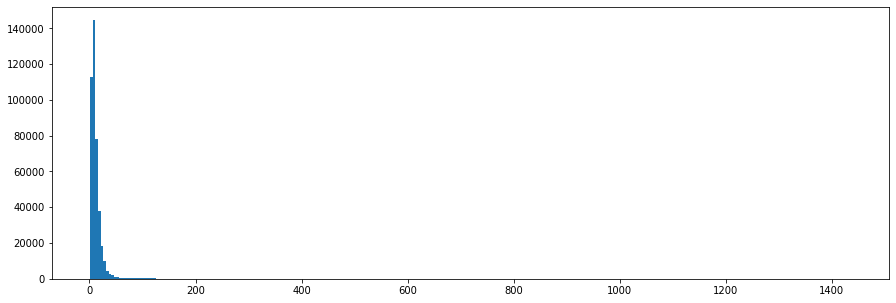

In [26]:
# plot the distribution of visually examine for some outliers

plt.figure(figsize=[15, 5])
bins = np.arange(1, df2['duration_minute'].max(),5)
plt.hist(df2['duration_minute'].dropna(), bins=bins);

>As we can see the majority of people ride duaration is in between 10 min - 60 min

In [27]:
df2

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,duration_minute,start_date,start_hourofday,start_dayofweek,start_month
0,71766,2018-03-31 16:58:33.149,2018-04-01 12:54:39.263,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,6,The Embarcadero at Sansome St,37.804770,-122.403234,341,Customer,No,1196.100000,2018-03-31,16,Saturday,March
1,62569,2018-03-31 19:03:35.916,2018-04-01 12:26:25.035,78,Folsom St at 9th St,37.773717,-122.411647,47,4th St at Harrison St,37.780955,-122.399749,536,Subscriber,No,1042.816667,2018-03-31,19,Saturday,March
2,56221,2018-03-31 20:13:13.564,2018-04-01 11:50:14.840,258,University Ave at Oxford St,37.872355,-122.266447,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3245,Customer,No,937.016667,2018-03-31,20,Saturday,March
3,85844,2018-03-31 11:28:07.658,2018-04-01 11:18:52.613,186,Lakeside Dr at 14th St,37.801319,-122.262642,340,Harmon St at Adeline St,37.849735,-122.270582,3722,Customer,No,1430.733333,2018-03-31,11,Saturday,March
4,1566,2018-03-31 23:37:56.640,2018-04-01 00:04:02.893,193,Grand Ave at Santa Clara Ave,37.812744,-122.247215,196,Grand Ave at Perkins St,37.808894,-122.256460,2355,Subscriber,No,26.100000,2018-03-31,23,Saturday,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421671,645,2018-05-01 00:07:24.129,2018-05-01 00:18:09.686,186,Lakeside Dr at 14th St,37.801319,-122.262642,179,Telegraph Ave at 27th St,37.816073,-122.267886,2405,Subscriber,No,10.750000,2018-05-01,00,Tuesday,May
421672,135,2018-05-01 00:15:53.983,2018-05-01 00:18:09.537,244,Shattuck Ave at Hearst Ave,37.873792,-122.268618,238,MLK Jr Way at University Ave,37.871719,-122.273068,2627,Subscriber,No,2.250000,2018-05-01,00,Tuesday,May
421673,316,2018-05-01 00:10:04.111,2018-05-01 00:15:20.981,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,45,5th St at Howard St,37.781752,-122.405127,2664,Subscriber,No,5.266667,2018-05-01,00,Tuesday,May
421674,183,2018-05-01 00:12:01.709,2018-05-01 00:15:05.441,243,Bancroft Way at College Ave,37.869360,-122.254337,267,Derby St at College Ave,37.861804,-122.253569,1236,Subscriber,Yes,3.050000,2018-05-01,00,Tuesday,May


### What is the structure of your dataset?

The original combined data contains approximately 1,860,000 individual trip records with 16 variables collected. The variables can be divided into 3 major categories:
- trip duration: `duration_sec`, `start_time`, `end_time`


- station info: `start_station_id`, `start_station_name`, `start_station_latitude`, `start_station_longitude`, `end_station_id`, `end_station_name`, `end_station_latitude`, `end_station_longitude`


- member info (anonymized): `bike_id`, `user_type`, `bike_share_for_all_trip`

Derived features/variables to assist exploration and analysis:
- trip info: `duration_minute`, `start_date`, `start_hourofday`, `start_dayofweek`, `start_month`



### What is/are interest things in the dataset?

I'm most interested is to understand the bike trips' duration and rental events occurrance patterns, along with relation with user type and the impact on the bike sharing service for. Sample questions to answer: When are most trips taken in terms of time of day, day of the week, or month of the year?


How long does the average trip take?


Does the above depend on if a user is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Each trip's start date/time and duration information will help understanding how long a trip usually takes and when. User type summarize bike usage data to see if there is any special pattern associated with a specific group of riders.

## Univariate Exploration

A series of plots to first explore the trips distribution over hour-of-day, day-of-week and month.

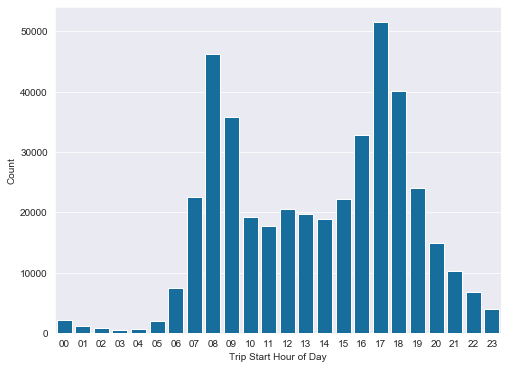

In [28]:
# trip distribution over day hours

plt.rcParams['figure.figsize'] = 8, 6
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

sb.countplot(data=df2, x='start_hourofday', color=base_color);
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Count');

As we can see the maximum ride take at pike time like moring 8-10(8am to 10am) and evning/night 17-19(5pm to 7pm).

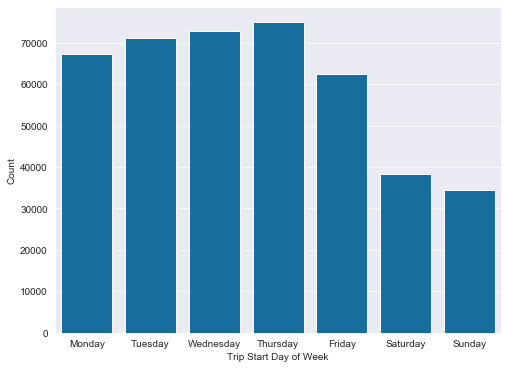

In [29]:
# trip distribution over weekdays
# issue 6: cast 'start_dayofweek' to category dtype

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df2['start_dayofweek'] = df2['start_dayofweek'].astype(weekdaycat)

sb.countplot(data=df2, x='start_dayofweek', color=base_color);
plt.xlabel('Trip Start Day of Week');
plt.ylabel('Count');

As we can see the riding or trip increase from Monday to Thursday and than decrease after Thursaday. Thursday is the pike or most ride or trip take by customers.

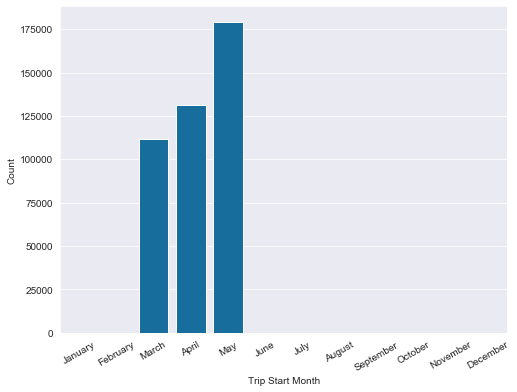

In [30]:
# trip distribution over months
# issue 7: cast 'start_month' to category dtype for easy plotting

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
df2['start_month'] = df2['start_month'].astype(monthcat)

sb.countplot(data=df2, x='start_month', color=base_color);
plt.xticks(rotation=30);
plt.xlabel('Trip Start Month');
plt.ylabel('Count');

The trip distribution over day hours peaks around two timeframes, 8am-10am and 17pm-19pm, during typical rush hours. As we can see in the graph by combined with the trip distribution over day of week plot, it is quite obvious that the majority of rides happened on work days (Mon-Fri) where Thursady most trip taken and primary usage is probably for commuting. In the 4 months in 2018, May had the most ride trips compared to the others, but overall it was the most popular during summer time (May), probably due to the weather in the area.   

The next several plots are around members/users to see what makes up of the riders.

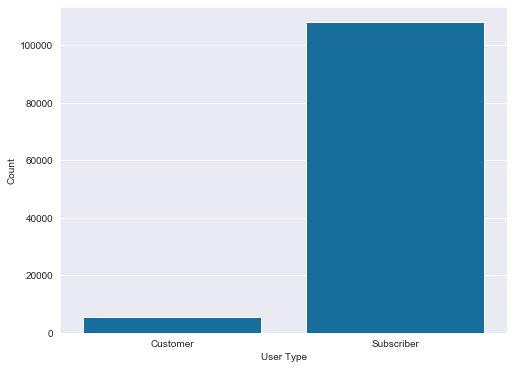

In [70]:
sb.countplot(data=df2, x='user_type', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Count');

From the above graph subscriber are the more compare to customer. From this we can say that people like subscription facility.

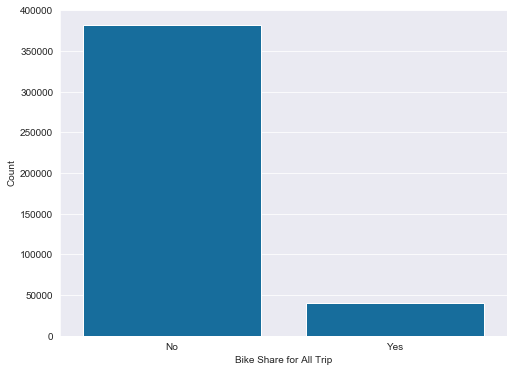

In [38]:
sb.countplot(data=df2, x='bike_share_for_all_trip', color=base_color);
plt.xlabel('Bike Share for All Trip');
plt.ylabel('Count');

From above graph we understand that majority of People don't like to share bike or ride. They want the privacy.

It was a little surprising to see the duration distribution spans pretty far to the right (indicates a long time rental, almost 24 hrs) while the majority of the rides were quite short (within 200 mins). Going to zoom in to the most cases for a closer picture of what the distribution is like.   

In [45]:
df2['duration_minute'].describe(percentiles=[.99])

count    421676.000000
mean         14.478560
std          42.122243
min           1.016667
50%           9.150000
99%          99.170833
max        1436.800000
Name: duration_minute, dtype: float64

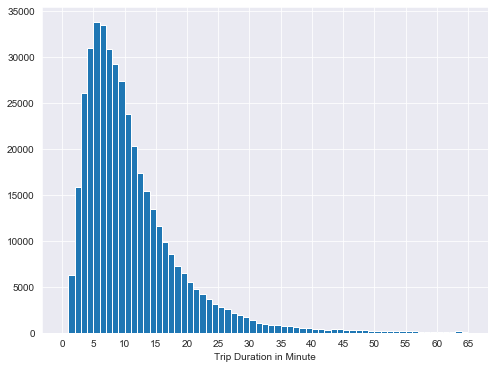

In [46]:
bins = np.arange(0, 66, 1)
ticks = np.arange(0, 66, 5)
plt.hist(data=df2, x='duration_minute', bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');

It looks like 99% of the trips were less than 1 hour long with most of them fell between 5 to 10 minutes range. I'll remove the outlier long trips for this study to allow focusing on the most common cases to explore the pattern.

In [50]:
# issue 8: filter out outlier trip records where the duration was very long

df2 = df2.query('duration_minute <= 60')
df2.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113548 entries, 5 to 421675
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             113548 non-null  int64         
 1   start_time               113548 non-null  datetime64[ns]
 2   end_time                 113548 non-null  datetime64[ns]
 3   start_station_id         113548 non-null  object        
 4   start_station_name       113548 non-null  object        
 5   start_station_latitude   113548 non-null  float64       
 6   start_station_longitude  113548 non-null  float64       
 7   end_station_id           113548 non-null  object        
 8   end_station_name         113548 non-null  object        
 9   end_station_latitude     113548 non-null  float64       
 10  end_station_longitude    113548 non-null  float64       
 11  bike_id                  113548 non-null  object        
 12  user_type       

### Discuss the distribution(s) of our variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The number of trips peaked around 8-10am and 17-19pm during a day, there were more trips on work days (Mon-Fri) compared to weekends. Summar time was the most popular season of a year, likely due to the weather. 

User-type wise there are more subscriber than customer. 

Most rides were quick and short, lasted between 5 to 10 minutes, though there were some very long outliers like 24hrs.

No transformation was needed luckily due to the straightforwardness of the data.

### The features we investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distribution of the trip duration was a little surprising at first plotting out the original data. Used .describe() and xticks() to zoom in to a smaller range where most trip records fell, which made the distribution much clearer. In order to help focusing on the main cases of typical use of the system, I filtered out the outlier long trip records for the study with .query(). 

In [51]:
# save the clean data to a .csv file

df2.to_csv('fordgobike_trips_2018_clean.csv', index=False)

## Bivariate Exploration

How does the trip duration distribution vary between customers and subscribers?

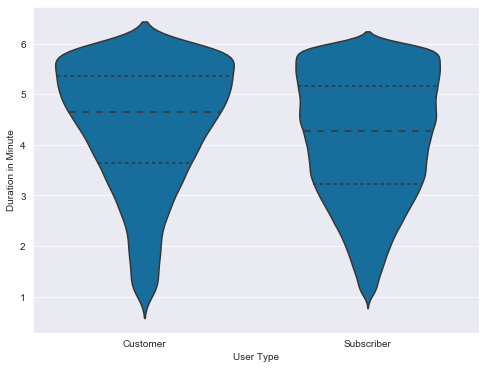

In [52]:
sb.violinplot(data=df2, x='user_type', y='duration_minute', color=base_color, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Duration in Minute');

The trip duration distribution is much narrower for customer compared to subscriber on the shorter/quicker trip end overall. It seems like subscribers have a more specific usage or targeted goal riding the bikes compared to customers who vary more and generally rented the bikes for longer.   

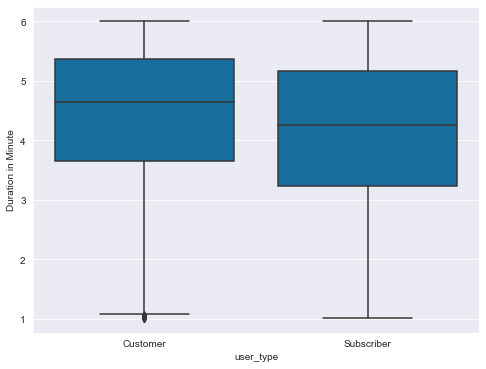

In [53]:
sb.boxplot(data=df2, x='user_type', y='duration_minute', color=base_color);
plt.xlabel('user_type');
plt.ylabel('Duration in Minute');

Though not a huge difference, subscriber tend to have shorter trips compared to customer, indicated by both a smaller median and shorter IQR.  

Average Trip Duration on Weekdays

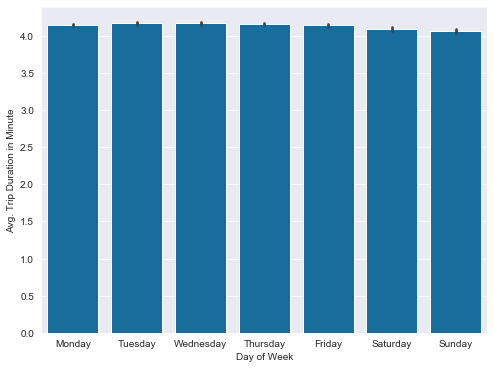

In [54]:
sb.barplot(data=df2, x='start_dayofweek', y='duration_minute', color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

The riding trips are geting decrease from Friday to sunday. It indicates a pretty stable and efficient usage of the sharing system on normal work days, while more casual flexible use on weekends. 

Average trip duration by month

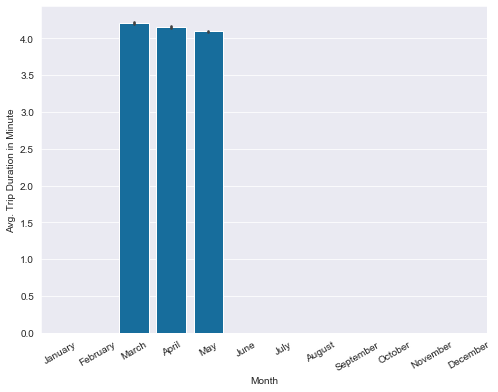

In [55]:
sb.barplot(data=df2, x='start_month', y='duration_minute', color=base_color);
plt.xticks(rotation=30);
plt.xlabel('Month');
plt.ylabel('Avg. Trip Duration in Minute');

Starting from February, the average usage time shown an decrease trend almost all the way til May before it down turned. The average longest trips happened during the march, which probably has a lot to do with the weather in the area.

Member age by weekdays

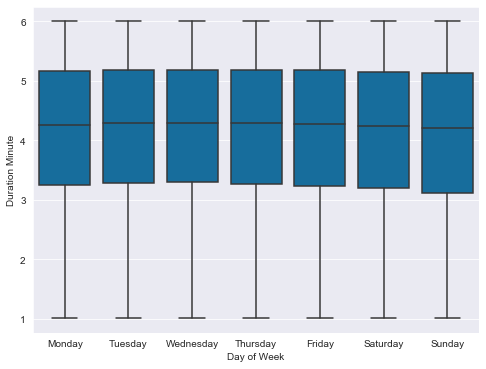

In [71]:
sb.boxplot(data=df2, x='start_dayofweek', y='duration_minute', color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Duration Minute');

Riders who rented the bikes Monday through Friday have almost same uper bound the difference we can see in lower bound, which corresponds to the commute to work usage that was observed from the above univariable exploration plots.  

Weekly usage between customers and subscribers

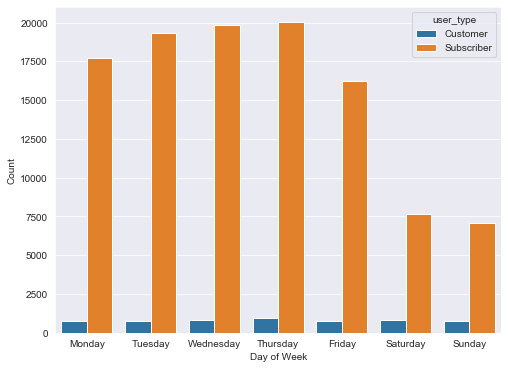

In [60]:
sb.countplot(data=df2, x='start_dayofweek', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Count');

There was much more subscriber usage than casual customers overall. The drop of volume on weekends for subscribers indicates that they primarily ride bikes for work commute during work days, whereas almost the opposite pattern of a slight increase of use for customers on weekends demonstrates that the use was more for relaxing purposes.  

Daily usage between customers and subscribers

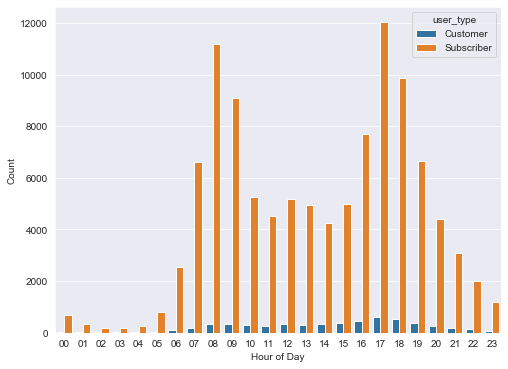

In [61]:
sb.countplot(data=df2, x='start_hourofday', hue='user_type');
plt.xlabel('Hour of Day');
plt.ylabel('Count');

Subscriber usage clearly peaks out on typical rush hours when people go to work in the morning and getting off work in the afternoon, double confirmed their usage purpose and goal of riding. Similar pattern was not observed among customers who tend to ride most in the afternoon or early evening as for a different purpose than the subscriber riders.

Yearly usage between customers and subscribers

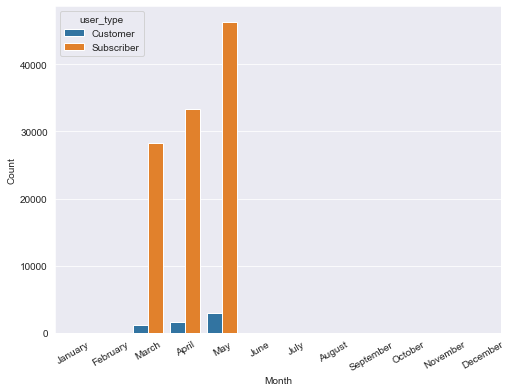

In [62]:
sb.countplot(data=df2, x='start_month', hue='user_type');
plt.xticks(rotation=30);
plt.xlabel('Month');
plt.ylabel('Count');

Both subscribers and customers ride the most during the summer months with subscribers maxed out in may and customers peaked in May.

Similar to the Member age by weekdays plot, subscribers who ride most often Monday through Friday are slightly older than customers, with a wider range of ages as well. 

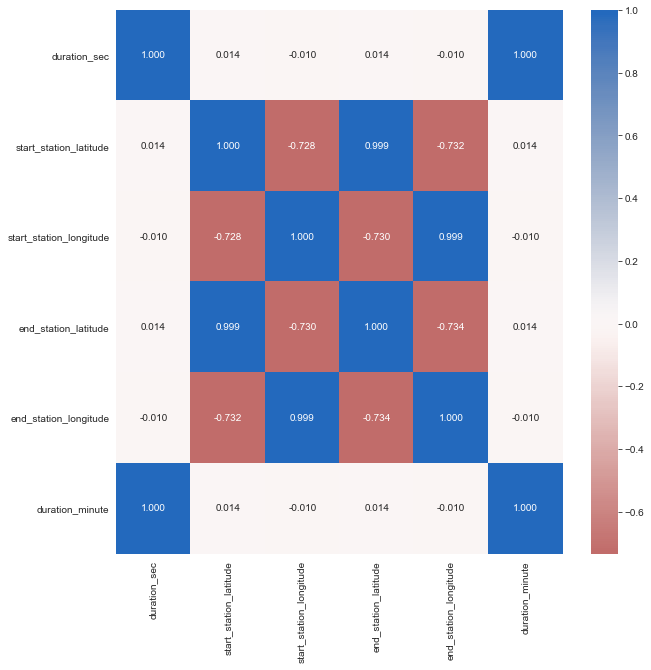

In [65]:
all_numeric_vars = ['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude',
'end_station_longitude', 'bike_id', 'duration_minute']
numeric_vars = ['duration_minute']
categoric_vars = ['start_time_dayofweek', 'start_time_hour', 'user_type']
plt.figure(figsize = [10, 10])
sb.heatmap(df2[all_numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

This show that there is possibility of correlation betwwen (start_station_latitute, start_station_longitude) and (end_station_latitude, end_station_longitude). There is not strong evidence present to support it.

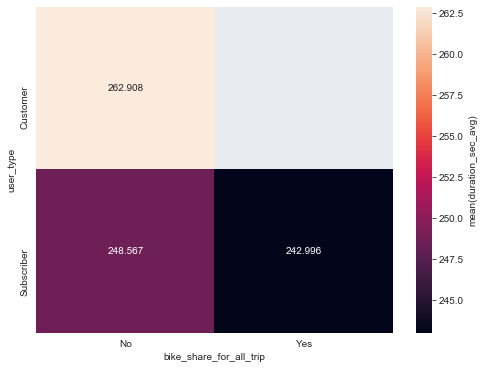

In [72]:
res = df2.groupby(['bike_share_for_all_trip', 'user_type']).mean()['duration_sec']
res = res.reset_index(name = 'duration_sec_avg')
res = res.pivot(index = 'user_type', columns = 'bike_share_for_all_trip',
                            values = 'duration_sec_avg')
sb.heatmap(res, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration_sec_avg)'});

As we can see Causal rider don't like to share the bike or ride. 

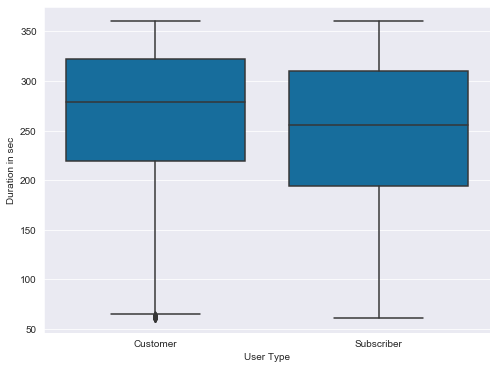

In [75]:
sb.boxplot(data=df2, x='user_type', y='duration_sec', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Duration in sec');

### Discuss about some of the relationships our observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There are a lot more subscriber usage than customers. The riding habit/pattern varies a lot between subscribers and customers. Subscribers use the bike sharing system for work commnute thus most trips were on work days (Mon-Fri) and especially during rush hours (when going to work in the morning and getting off work in the afternoon), whereas customers tend to ride for fun in the afternoon or early evenings over weekends. Subscriber users are slightly older than customer users who tend to take longer rides overall especially during the summer.  

### Is our observe have any interesting relationships between the other features (not the main feature(s) of interest)?

It is interesting to see that people like subscribers plan  than customers on average but take much shorter/quicker rides. And May had the most bike riding usage for subscribers throughout the year. 

## Multivariate Exploration

How does the average trip duration vary in weekdays between customers and subscribers?

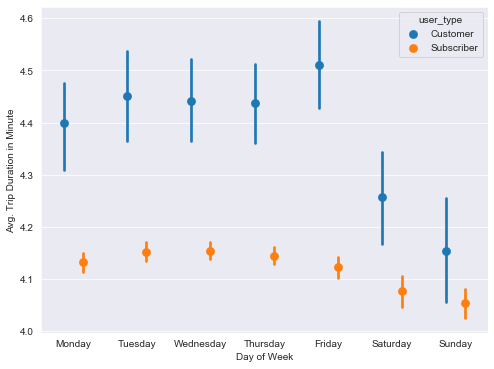

In [68]:
sb.pointplot(data=df2, x='start_dayofweek', y='duration_minute', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

It can be seen from the above plot that subscribers ride much shorter/quicker trips compared to customers on each day of the week. Both user types have an obvious increase of trip duration on Saturdays and Sundays over weekends, especially for casual riders. Subscribers usage seems to be more efficient than customers overall and maintained a very consistent average duration Monday through Friday.     

How does the hourly usage vary during weekdays for customers and subscribers?

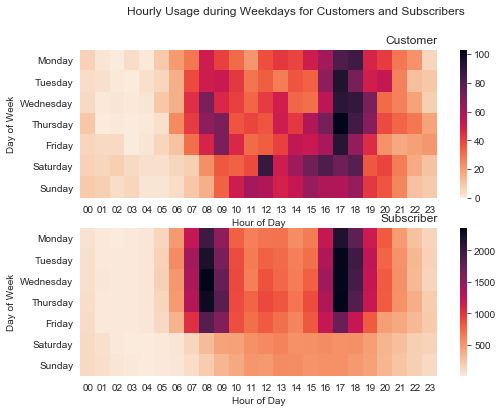

In [69]:
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers')

plt.subplot(2, 1, 1)
customers = df2.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_dayofweek', 'start_hourofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
subscribers = df2.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_dayofweek', 'start_hourofday']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

The heatmaps shows clearly very different usage pattern/habit between the two type of riders. Subscribers use the system heavily on work days i.e. Monday through Friday whereas customers ride a lot on weekends, especially in the afternoon. Many trips concentrated around 8-10am and 17-19pm on work days for subscribers when used for work commute, yet customers tend to use more in the late afternoon around 17pm Monday to Friday. Other than usage purpose and habit, it may also have to do with the traffic situation around these rush hours in the area.  

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The multivariate exploration strengthened some of the patterns discovered in the previous bivariate exploration as well as univariate exploration, the relationship between the multiple variables plotted are visualized altogether and information are presented combined. The efficient/short period of usage for subscribers corresponds to their high concentration on rush hours Monday through Friday, indicating the use is primarily for work commute. The more relaxing and flexible pattern of customer use shows that they're taking advantage of the bike sharing system quite differently from the subscribers, heavily over weekends and in the afternoon, for city tour or leisure purpose probably.        

### Were there any interesting or surprising interactions between features?

The interactions between features are all supplementing each other and quite make sense when looked at combined, there's no big surprise observed. The usage habit difference between subscriber and customer is not that much or obvious throughout the exploration, which could be related to the imbalanced number of customer riders/records compared to subscriber ones. It'd be interesting to see how subscriber and customer use the system differently.    